### Outlairs analyis 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [56]:
visa_df = pd.read_csv(r"C:\Users\SAMAR\PycharmProjects\Naresh IT\Classroom\Python seassons\data files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


#### BOX -Plot
-  box plot use fro deteect outlairs 
- box plot has minimum value Q1,Q2,Q3 and max value
-  insde box plot the red line represnt median which is 50percentile data
- 
     #### Outlairs
      - very very samll or huge obervation
      - which pull the data in any side of the distribution
- for mild outlairs 
- Q1-1.5*IQR  and Q3+1.5*IQR

- for strong outlairs 
- Q1-3*IQR  and Q3+3*IQR


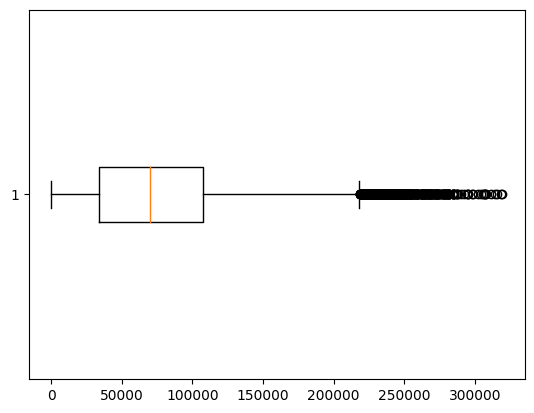

In [57]:
plt.boxplot(x= visa_df["prevailing_wage"],vert=False)
plt.show()

<Axes: >

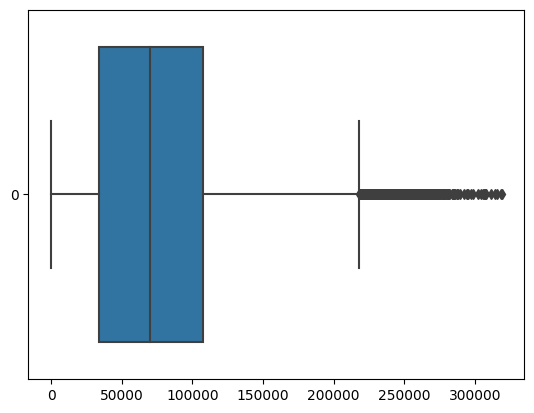

In [58]:
sns.boxplot(visa_df["prevailing_wage"],orient="h")

Text(0.5, 1.0, 'Boxplot')

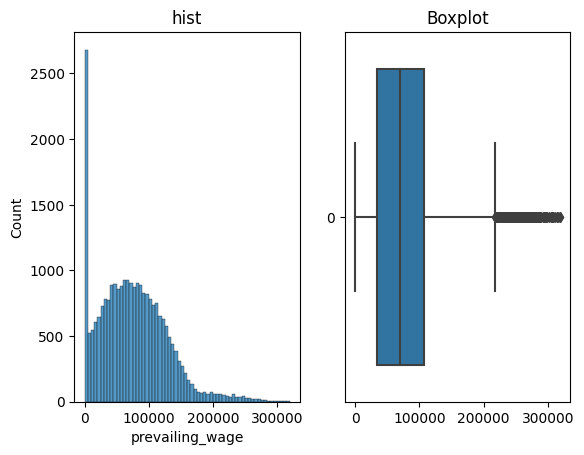

In [59]:
plt.subplot(1,2,1)
sns.histplot(visa_df["prevailing_wage"])
plt.title("hist")

plt.subplot(1,2,2)
sns.boxplot(visa_df["prevailing_wage"],orient="h")
plt.title("Boxplot")

Text(0.5, 1.0, 'Boxplot')

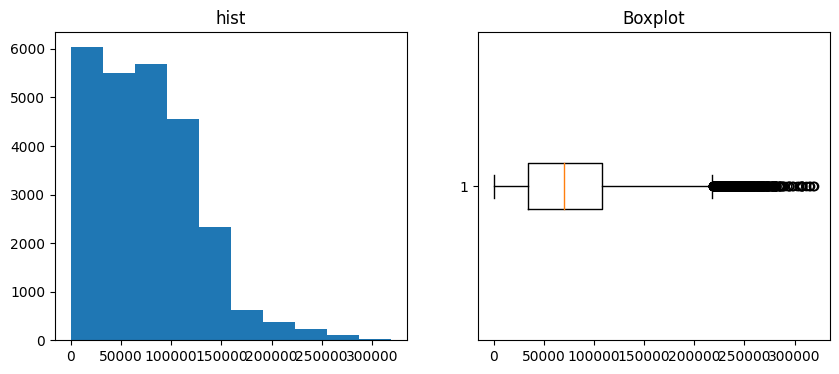

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1).hist(visa_df["prevailing_wage"])
plt.title("hist")

plt.subplot(1,2,2).boxplot(visa_df["prevailing_wage"],vert=False)
plt.title("Boxplot")


#### How to find Outlairs
- outlairsa are avalibe less than  q1-1.5*iqr 
- outlairs are avalive greteer then q3-1.5*iqr

- step 1
-  calculate Q1 value 
-  calculate q3 value
-  calculate iqr value

step -2
- lower bound = q1- 1.5* iqr 
- upper bound = q3 +1.5 =*iqr

step -3

con1 = visa_df[col]<LB
con2 = visa_df[col]>ub


apply or operator 

In [61]:
# step =1
q1 = round(np.percentile(visa_df["prevailing_wage"],25),2)
q3 = round(np.percentile(visa_df["prevailing_wage"],75),2)
print(q1,q3)

34015.48 107735.51


In [62]:
# step 2
iqr = q3-q1
iqr

73720.03

In [63]:
# step 3
lb = q1-1.5*(iqr)
ub = q3+1.5*(iqr)
print(lb,ub)

-76564.565 218315.555


In [64]:
# step 4
con1 = visa_df["prevailing_wage"]<lb
con2 = visa_df["prevailing_wage"]>ub
outlairs = visa_df[con1 | con2]
len(outlairs)

427

### Non outlairs data

In [65]:
con1 = visa_df["prevailing_wage"]>lb
con2 = visa_df["prevailing_wage"]<ub
non_outlairs = visa_df[con1 & con2]
len(non_outlairs)

25053

### Plot histogarm and boxplot for non outlairs data

Text(0.5, 1.0, 'Boxplot')

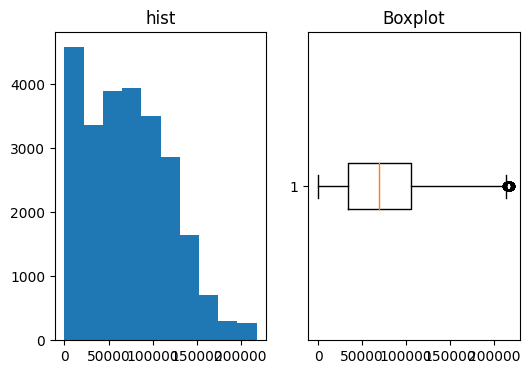

In [69]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1).hist(non_outlairs["prevailing_wage"])
plt.title("hist")

plt.subplot(1,2,2).boxplot(non_outlairs["prevailing_wage"],vert=False)
plt.title("Boxplot")


#### 4 plot at at time

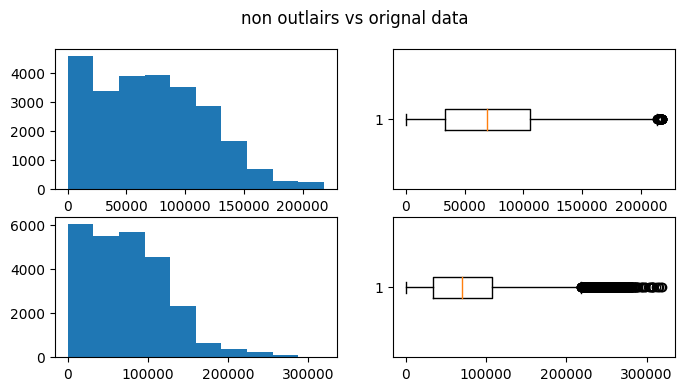

In [72]:
plt.figure(figsize=(8,4))
plt.suptitle("non outlairs vs orignal data")

plt.subplot(2,2,1).hist(non_outlairs["prevailing_wage"])
plt.subplot(2,2,2).boxplot(non_outlairs["prevailing_wage"],vert=False)


plt.subplot(2,2,3).hist(visa_df["prevailing_wage"])
plt.subplot(2,2,4).boxplot(visa_df["prevailing_wage"],vert=False)

plt.show()

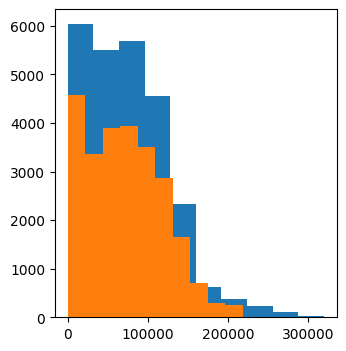

In [76]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1).hist(visa_df["prevailing_wage"])
plt.subplot(1,2,1).hist(non_outlairs["prevailing_wage"])
plt.show()

### How to deal with outlairs
- Meathod 1
- drop the outlairs (its not a effiicent idea bacsue of data loss)
- if outlairs is less then 2% then we can do that

-  methord 2
-  fill with median value
- we already know that outlais dosenot affect median 

- meathord -3
- - cap the values with q1 and q3 
- all less then lower bound value we can replace q1 or lb
-  all upper bound value we can replace with q3 or upper bound


### Fill with median
-  create empty list
- itrate the visadf["previlage wage].values
- if each value <lb or >ub 
-  then append with median value
- else append with i value

In [83]:
median_val = visa_df["prevailing_wage"].median()
median_val

70308.20999999999

In [98]:
## Find the outlairs
# step =1
q1 = round(np.percentile(visa_df["prevailing_wage"],25),2)
q3 = round(np.percentile(visa_df["prevailing_wage"],75),2)
print("q1,q3",q1,q3)

# step 2
iqr = q3-q1
print("iqr",iqr)

# step 3
lb = q1-1.5*(iqr)
ub = q3+1.5*(iqr)
print("lb,ub",lb,ub)


# step 4
con1 = visa_df["prevailing_wage"]<lb
con2 = visa_df["prevailing_wage"]>ub
outlairs = visa_df[con1 | con2]
len(outlairs)



q1,q3 34015.48 107735.51
iqr 73720.03
lb,ub -76564.565 218315.555


427

In [89]:
lst = []
for i in  visa_df["prevailing_wage"].values:
    if i <lb or i>ub:
        lst.append(median_val)
    else:
        lst.append(i)

In [90]:
## copy the data and update the data with list data
visa_df_copy = visa_df.copy()
visa_df_copy["prevailing_wage"]= lst

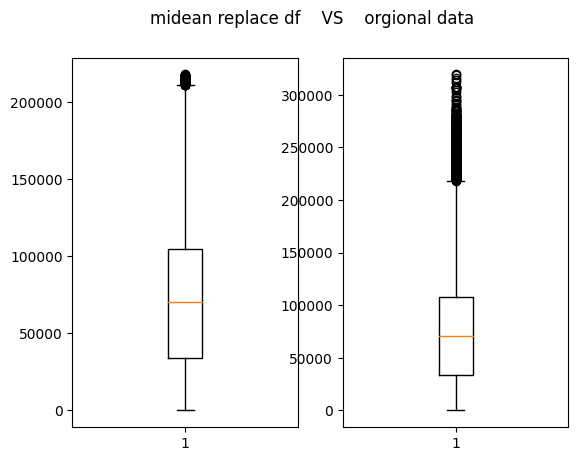

In [94]:
plt.suptitle("midean replace df    VS    orgional data")
plt.subplot(1,2,1).boxplot(visa_df_copy["prevailing_wage"])
plt.subplot(1,2,2).boxplot(visa_df["prevailing_wage"])
plt.show()

## using np.where for outlairs
#### used for binary condition

- it has 3 arguments
  - conditon
  - value if condition is True
  - value if condition is Flase

In [101]:
d = {"sub":["DS","ML","CS"],
     "marks":[100,150,20]}
df = pd.DataFrame(d)
df

,sub,marks
0,DS,100
1,ML,150
2,CS,20


In [104]:
con = df["marks"]>100
l = np.where(con,1,df["marks"])
l

array([100,   1,  20], dtype=int64)

In [108]:
con1 = visa_df["prevailing_wage"]>ub 

con2 = visa_df["prevailing_wage"]<lb
con = con1 | con2

new = np.where(con1,median_val,visa_df["prevailing_wage"])  # use where for replace median value with a column
new

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

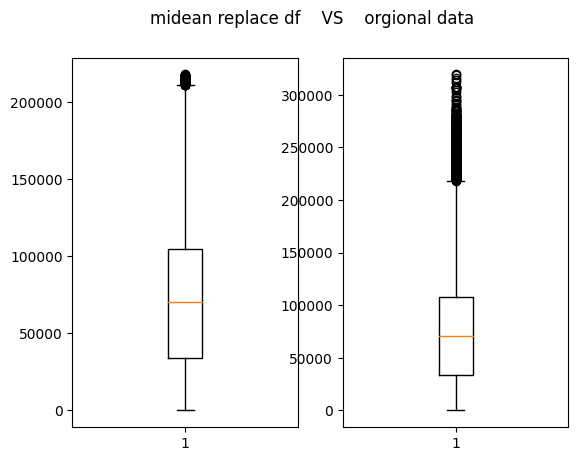

In [109]:
visa_df_copy1 = visa_df.copy()
visa_df_copy1["prevailing_wage"] = new    # replace the column with old columns

plt.suptitle("midean replace df    VS    orgional data")
plt.subplot(1,2,1).boxplot(visa_df_copy1["prevailing_wage"])
plt.subplot(1,2,2).boxplot(visa_df["prevailing_wage"])
plt.show()